In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

from collections import Counter
from sklearn.svm import SVC
import keras_metrics

In [100]:
df = pd.read_csv('creditcard.csv')

## Data Analysis and Preprocessing

In [101]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [103]:
df.shape

(284807, 31)

#### Checking for missing values

In [104]:
print("Percentage of Nans: ", df.isnull().sum().sum()/len(df))

Percentage of Nans:  0.0


#### Check if the dataset is balanced

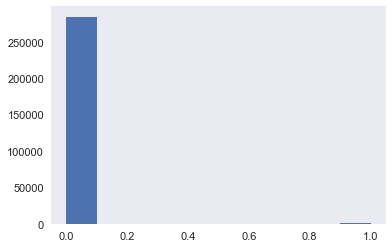

In [105]:
df['Class'].hist(grid=False)
plt.show()

As can be seen, the data is highly unbalanced. Thus, undersampling or oversampling needs to be performed. To prevent dupicated data, undersampling will be implemented. As alternative, the generation of synthetic data could be performed, using the SMOTE method.

#### Undersampling

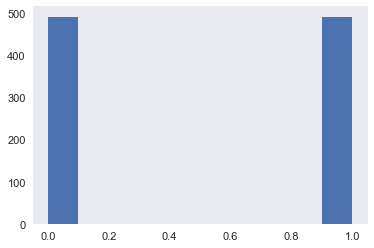

In [106]:
fraud_data = df[df['Class'] == 1]
non_fraud_data = df[df['Class'] == 0]

n_frauds = len(fraud_data)

new_df = pd.concat([fraud_data, non_fraud_data.sample(frac=1).reset_index(drop=True)[:n_frauds]]).reset_index(drop=True)

new_df['Class'].hist(grid=False)
plt.show()

#### Split original data into training and test set

In [107]:

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size = 0.3, random_state = 0)


#### Split undersampled data into training and test set

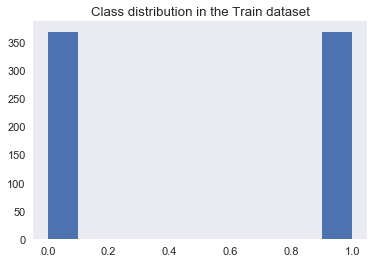

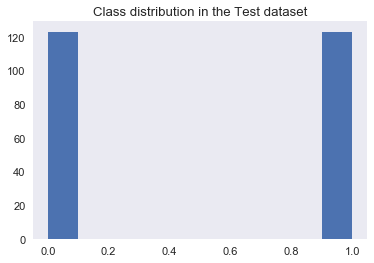

In [108]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)

X = new_df.drop(['Class'], axis=1)
y = new_df['Class']

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


y_train.hist(grid=False)
plt.title("Class distribution in the Train dataset")
plt.show()

y_test.hist(grid=False)
plt.title("Class distribution in the Test dataset")
plt.show()

This way we obtain balanced train and test sets

#### Normalize data

In [109]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88929.944106,-2.349996,1.771032,-3.487226,2.262678,-1.609412,-0.650384,-2.807379,0.270032,-1.290458,...,0.340840,-0.013894,-0.009882,-0.060625,0.007071,0.027888,0.082115,0.041706,107.562988,0.500000
std,48249.950227,5.518598,3.676468,6.223409,3.220060,4.177469,1.773804,5.850206,4.957800,2.340773,...,2.853860,1.196666,1.154560,0.574265,0.680081,0.482777,1.008689,0.443293,230.438782,0.500254
min,17.000000,-30.552380,-8.402154,-31.103685,-3.763248,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.328161,-4.781606,-1.227472,-7.263482,-1.869290,0.000000,0.000000
25%,47794.750000,-2.837530,-0.294962,-5.074851,-0.120443,-1.791352,-1.551056,-3.060742,-0.188102,-2.340957,...,-0.187835,-0.557423,-0.242571,-0.403293,-0.340689,-0.273901,-0.058299,-0.056298,1.790000,0.000000
50%,81697.000000,-0.764891,0.912143,-1.295752,1.356477,-0.519893,-0.613952,-0.717199,0.154568,-0.702621,...,0.144209,-0.006790,-0.022624,-0.005645,0.040913,-0.019693,0.046014,0.035099,19.660000,0.500000
75%,135096.750000,1.059034,2.814266,0.292075,4.289110,0.435261,0.115416,0.232525,0.877002,0.173551,...,0.645911,0.569676,0.200876,0.372281,0.388473,0.317377,0.426509,0.208837,99.990000,1.000000
max,170487.000000,2.268482,22.057729,3.427940,12.114672,11.095089,6.894453,6.868624,20.007208,7.012826,...,27.202839,8.361985,5.466230,1.209759,2.208209,2.745261,3.052358,3.854891,2125.870000,1.000000


Only the columns *Time* and *Amount* are not scaled, thus these will be scaled next

In [110]:
#RobustScale is used as it is more robust to outliers than StandardScaler
rob_scaler = RobustScaler()

amount_scaler = rob_scaler.fit(X_train['Amount'].values.reshape(-1,1))
X_train['Amount'] = amount_scaler.transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = amount_scaler.transform(X_test['Amount'].values.reshape(-1,1))

time_scaler = rob_scaler.fit(X_train['Time'].values.reshape(-1,1))
X_train['Time'] = amount_scaler.transform(X_train['Time'].values.reshape(-1,1))
X_test['Time'] = amount_scaler.transform(X_test['Time'].values.reshape(-1,1))


/Users/danielazevedo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/danielazevedo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/danielazevedo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [111]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
481,0.923991,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-0.475126,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,-0.074842
331,0.183752,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,...,4.100019,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,-0.190006
380,0.520681,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,2.611919
277,0.015665,-2.207631,3.259076,-5.436365,3.684737,-3.066401,-0.671323,-3.696178,1.822272,-3.049653,...,0.808336,0.920899,0.037675,0.026754,-0.791489,0.176493,-0.136312,1.087585,0.373834,2.251457
879,-0.369354,-0.249605,-0.169741,-1.616743,-3.508833,1.684426,2.681156,-0.653652,1.086630,-2.682807,...,-0.261680,-0.037161,0.087061,0.068660,0.982350,-0.564499,-0.405240,0.333890,0.200126,-0.047451


### Feature Selection

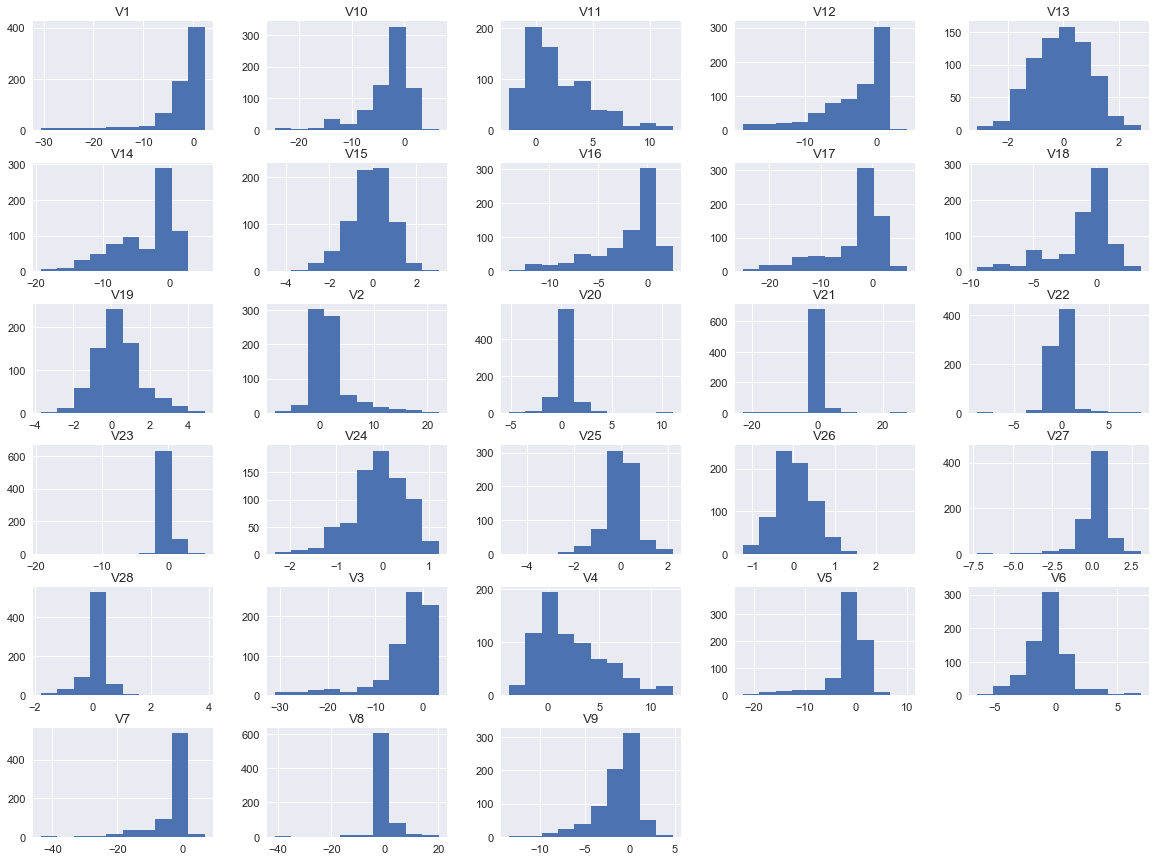

In [112]:
X_train.drop(['Time', 'Amount'], axis=1).hist(figsize=(20, 15))
plt.show()

In [113]:
for i in X_train.columns.values:
    positive_samples = X_train.loc[y_train[y_train == 1].index, i]    
    negative_samples = X_train.loc[y_train[y_train == 0].index, i]
    
    _, norm_p_value = stats.normaltest(X_train[i])
    
    if(norm_p_value > 0.05):
        print("Column ", i, ': Normal Distribution')
    else:
        print("Column ", i, ': Non Normal Distribution')


Column  Time : Non Normal Distribution
Column  V1 : Non Normal Distribution
Column  V2 : Non Normal Distribution
Column  V3 : Non Normal Distribution
Column  V4 : Non Normal Distribution
Column  V5 : Non Normal Distribution
Column  V6 : Non Normal Distribution
Column  V7 : Non Normal Distribution
Column  V8 : Non Normal Distribution
Column  V9 : Non Normal Distribution
Column  V10 : Non Normal Distribution
Column  V11 : Non Normal Distribution
Column  V12 : Non Normal Distribution
Column  V13 : Normal Distribution
Column  V14 : Non Normal Distribution
Column  V15 : Non Normal Distribution
Column  V16 : Non Normal Distribution
Column  V17 : Non Normal Distribution
Column  V18 : Non Normal Distribution
Column  V19 : Non Normal Distribution
Column  V20 : Non Normal Distribution
Column  V21 : Non Normal Distribution
Column  V22 : Non Normal Distribution
Column  V23 : Non Normal Distribution
Column  V24 : Non Normal Distribution
Column  V25 : Non Normal Distribution
Column  V26 : Non Normal

As it is illustrated above, the significant percentage of the variables do not follow a normal distribution (ex: V3, V7, V18, ...), therefore the Spearman test will be used for checking the correlation between variables

#### Correlation

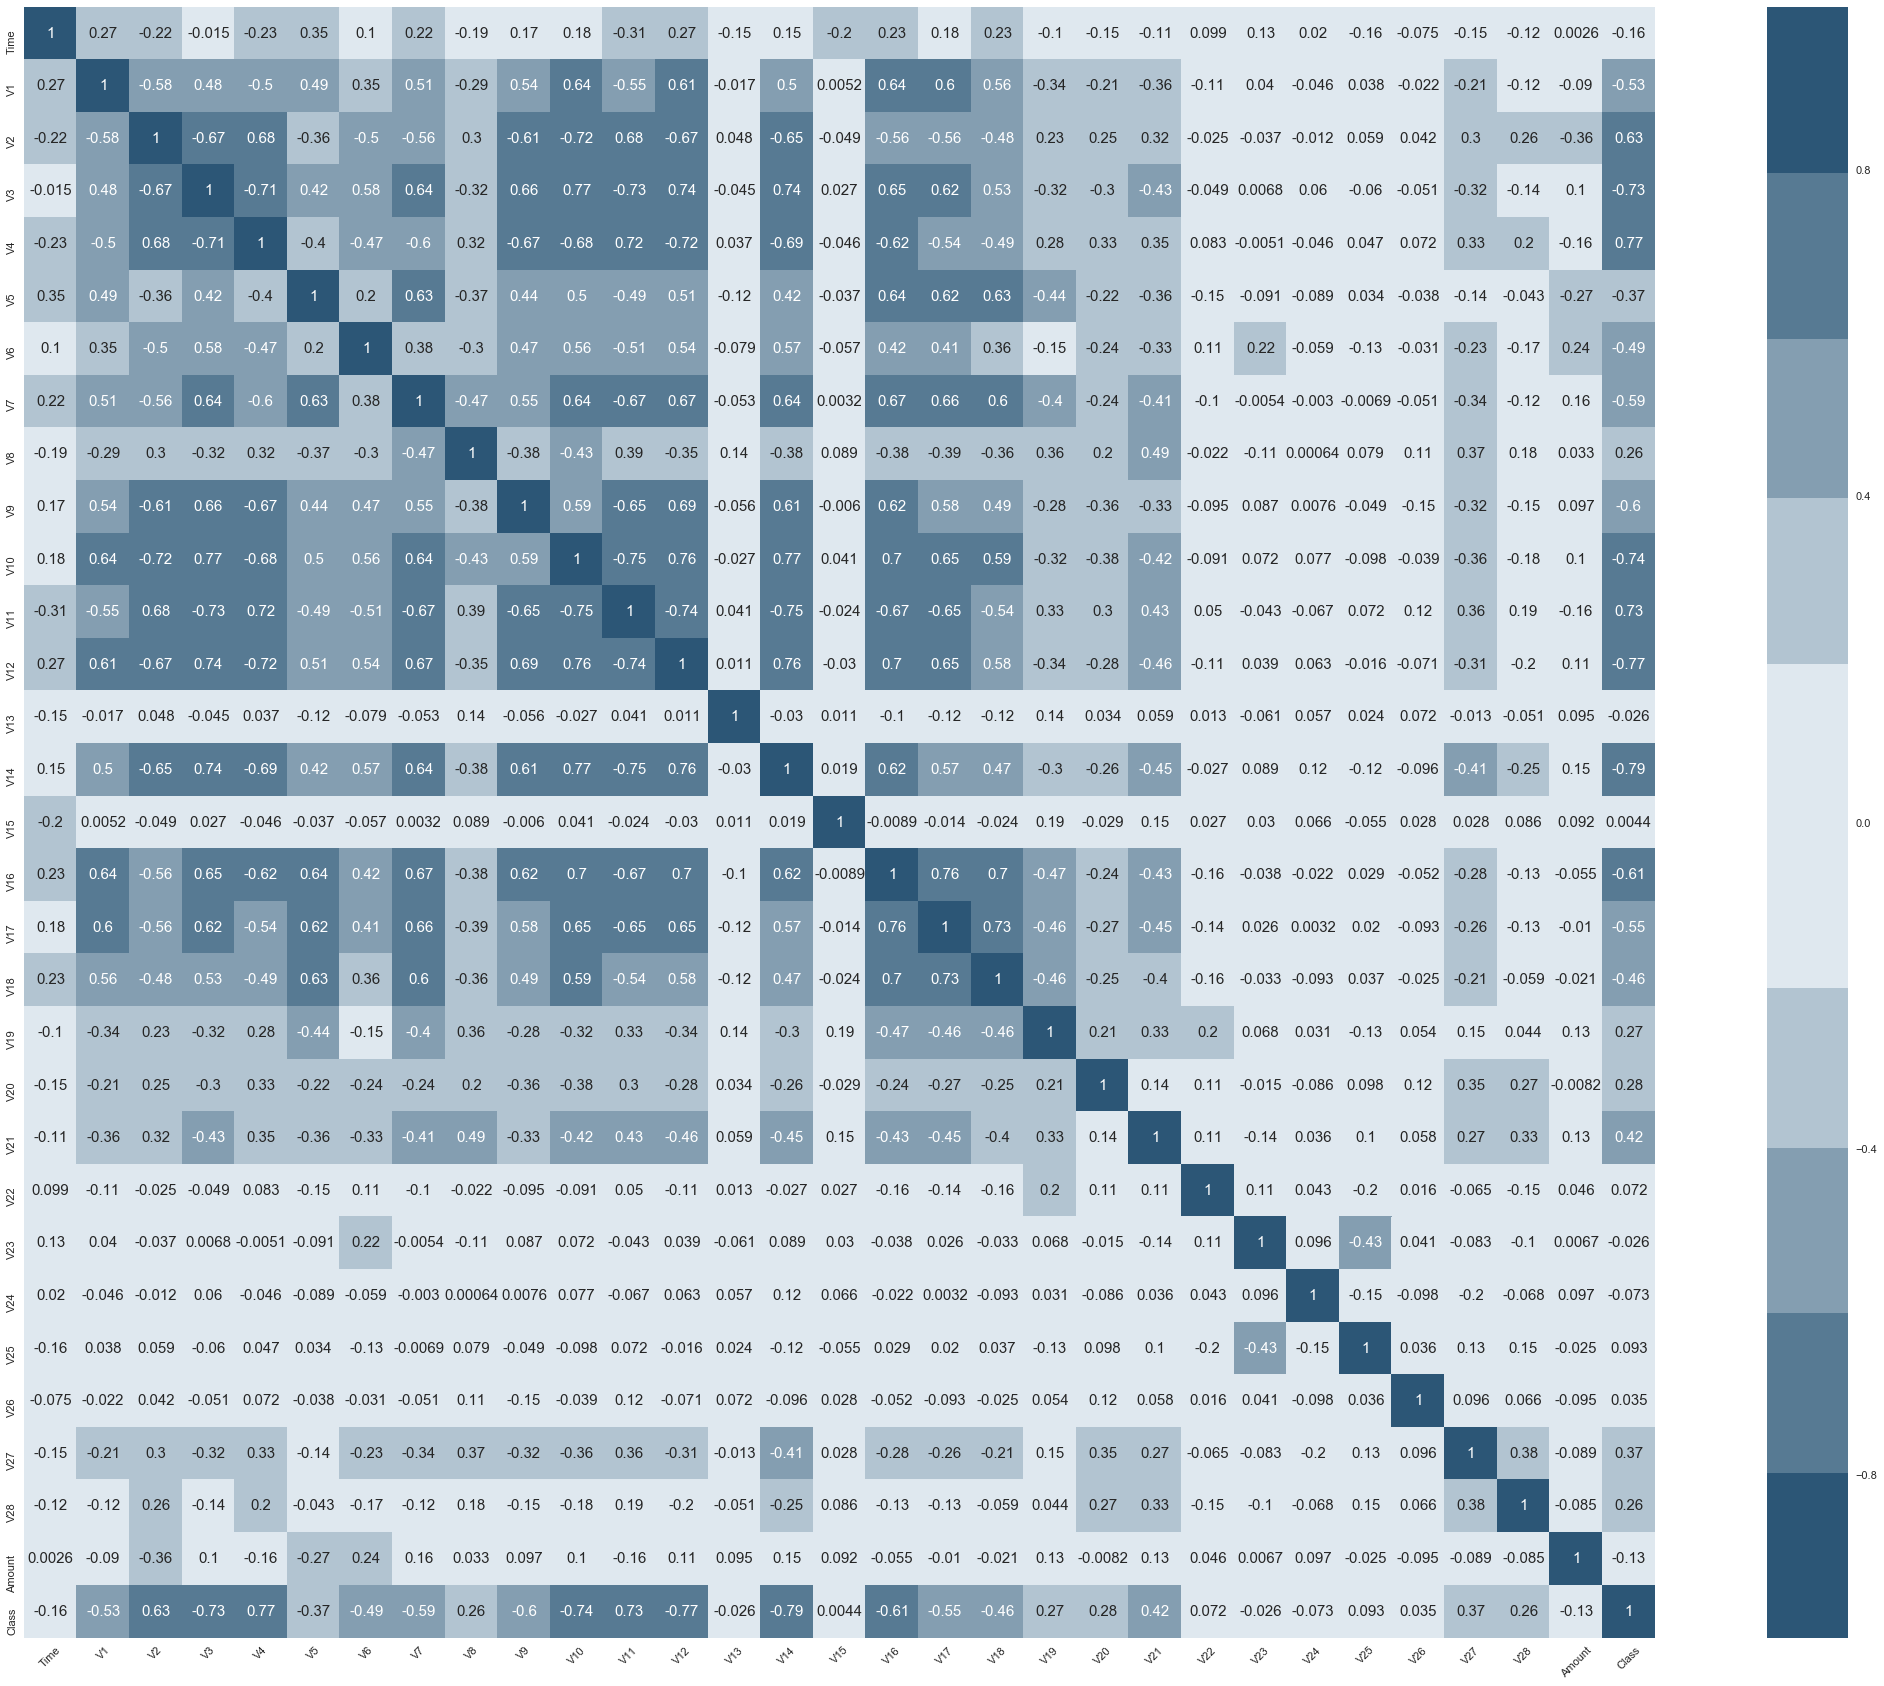

In [114]:
corr_values = pd.concat([X_train, y_train], axis = 1).corr(method = 'spearman')

plt.figure(figsize=(40, 30))

sns.set(font_scale=1.1)

ax = sns.heatmap(
    corr_values, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 240, l=35, n=10),
    square=True,
    annot=True, annot_kws={"size": 15}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='center'
);

plt.show()     

n = 4

Positive Correlation with Class: V2, V4, V11, V19
<br>
Negative Correlation with Class: V3, V10, V12, V14

This means that the higher the variables **V2, V4, V11 and V19** are, the more probable it is a fraudulent transaction
<br>
This means that the lower the variables **V3, V10 V12 and V14** are, the more probable it is a fraudulent transaction

#### Statistical Test

As pratically all the features do not follow a Normal distribution, the **Mann Whitney U** test will be used to compute the statistical difference between the positive and negative samples within each feature. Then the samples with the higher t values will be chosen, as it means that they can better discriminate the positive and negative samples

In [115]:
discriminant_features = []
t_values = []

for i in X_train.columns.values:
    positive_samples = X_train.loc[y_train[y_train == 1].index, i]    
    negative_samples = X_train.loc[y_train[y_train == 0].index, i]
    
    test_statistic, p_value = stats.mannwhitneyu(positive_samples, negative_samples, alternative='two-sided')
    if p_value < 0.05:
        discriminant_features.append(i)
        t_values.append(test_statistic)
    


In [116]:
n = 8
np.array(discriminant_features)[[np.array(t_values).argsort()[-n:][::-1]]]

/Users/danielazevedo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array(['V4', 'V11', 'V2', 'V21', 'V27', 'V20', 'V19', 'V8'], dtype='<U6')

Thus, the columns that differ more significantly regarding the positive and negative samples are: V2, V4, V8, V11, V19, V20, V21, V27

By combining the set of most **correlated features** with the **most discriminant features** we obtain the set [V2, V3, V4, V8, V11, V12, V14, V19, V20, V21, V27].
<br>
<br>
Note*: We can define more strict or relaxed criteria to select more or less features in the final feature set

In [117]:
X_train = X_train[['V2', 'V3', 'V4', 'V8', 'V11', 'V12', 'V14', 'V19', 'V20', 'V21', 'V27']]
X_test = X_test[['V2', 'V3', 'V4', 'V8', 'V11', 'V12', 'V14', 'V19', 'V20', 'V21', 'V27']]

X_train_original = X_train_original[['V2', 'V3', 'V4', 'V8', 'V11', 'V12', 'V14', 'V19', 'V20', 'V21', 'V27']]
X_test_original = X_test_original[['V2', 'V3', 'V4', 'V8', 'V11', 'V12', 'V14', 'V19', 'V20', 'V21', 'V27']]

## Model for predicting fraud

Due to the good results presented in other Kernels, I will test the **Logistic Regression** and **Support Vector Machine (SVM)** techniques to predict the Credit Card transactions that were considered fraudulent. 
<br>
The metric that will be used for evaluating the methods performance, during training, will be **recall** due to the fact that it works well with unbalanced data.
<br>
For comparing the different methods score in the test set, the **AUC score** and **Confusion Matrix** will be used.

In [118]:
#Auxiliary functions

def plt_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_score = auc(fpr, tpr)
    
    print("AUC Score: ", roc_score)

    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    

def plot_train_evolution(history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    ax[0].plot(history['loss'], '.', label='Train Loss')
    ax[0].plot(history['val_loss'], '.', label='Validation Loss')
    
    
    ax[1].plot(history['recall'], '.', label='Train Accuracy')
    ax[1].plot(history['val_recall'], '.', label='Validation Accuracy')
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].legend()
    
    plt.show()

### Logistic Regression

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn


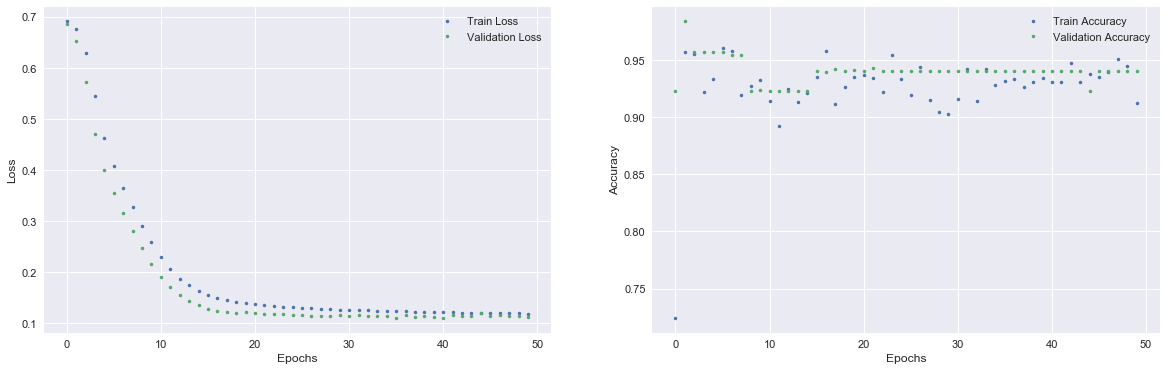

In [119]:
classifier = Sequential()

classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [keras_metrics.recall()])


history = classifier.fit(X_train, y_train, epochs = 50, validation_split=0.2, verbose=0)

plot_train_evolution(history.history)

By using the plots above, we can see that the model is indeed improving its performance (based on the recall metric). Also, by analysing the left graph, an **Early Stopping** in the training was performed with the goal of preventing overfitting.

#### Apply Cross Validation

Parameter tuning will be applied in the Logistic Regression model, with the goal of improving the model performance

In [120]:

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = [keras_metrics.recall()])

    return classifier

classifier = KerasClassifier(build_fn = build_classifier)


parameters = {'epochs': [15, 100, 150],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train, verbose=0)
best_parameters = grid_search.best_params_
best_recall = grid_search.best_score_
best_model = grid_search.best_estimator_

print('Best Params: ', best_parameters, '\nBest Recall: ', best_recall)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0'

#### Test the trained model in the undersampled test set

Confusion Matrix:
[[118   5]
 [ 17 106]]
AUC Score:  0.9105691056910569


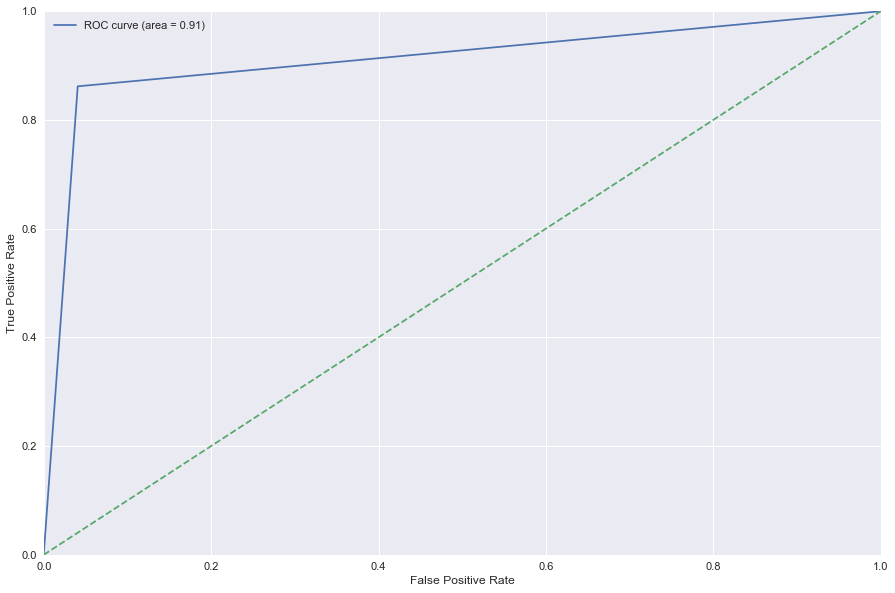

In [121]:

y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt_roc_curve(y_test, y_pred)

The trained model, when applied to the undersampled test set, obtained good results, with an AUC score of 91%.

#### Test the trained model in the original (and highly unbalanced) test set

Confusion Matrix:
[[83265  2031]
 [   11   136]]
AUC Score:  0.9506794346889009


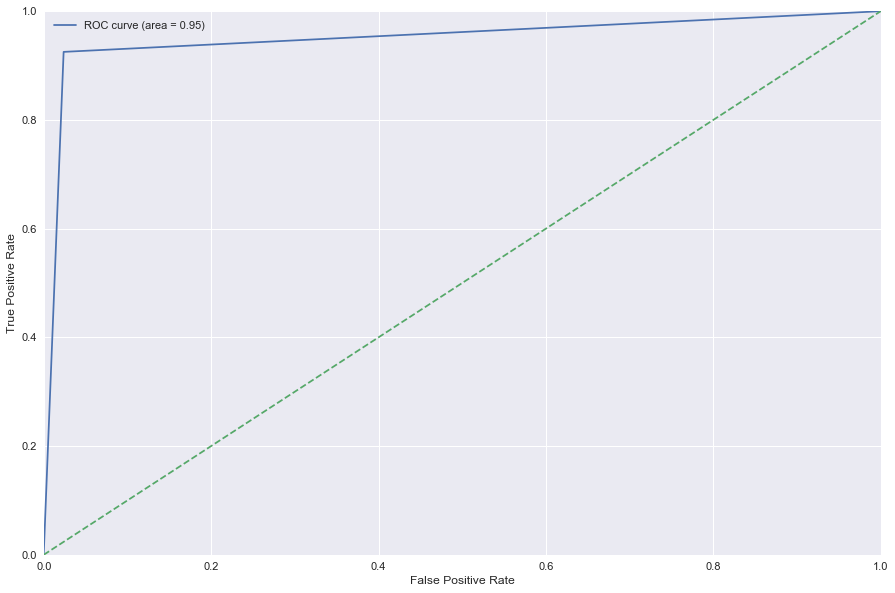

In [126]:

y_pred = best_model.predict(X_test_original)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test_original, y_pred)
print("Confusion Matrix:")
print(cm)

plt_roc_curve(y_test_original, y_pred)

As we can see, even using an unbalanced data set, the model performed well, obtaining an AUC score of 95%.

### SVM

In [123]:
#simplest architecture
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Test the trained model in the undersampled test set

Confusion Matrix:
[[120   3]
 [ 21 102]]
AUC Score:  0.9024390243902438


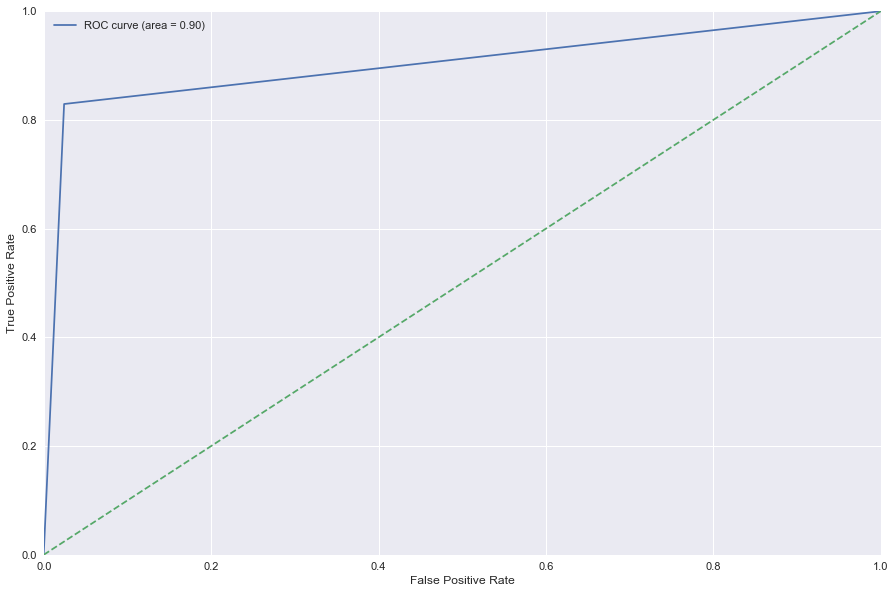

In [124]:
y_pred = svclassifier.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt_roc_curve(y_test, y_pred)

#### Test the trained model in the original (and highly unbalanced) test set

Confusion Matrix:
[[83935  1361]
 [   15   132]]
AUC Score:  0.941001492043075


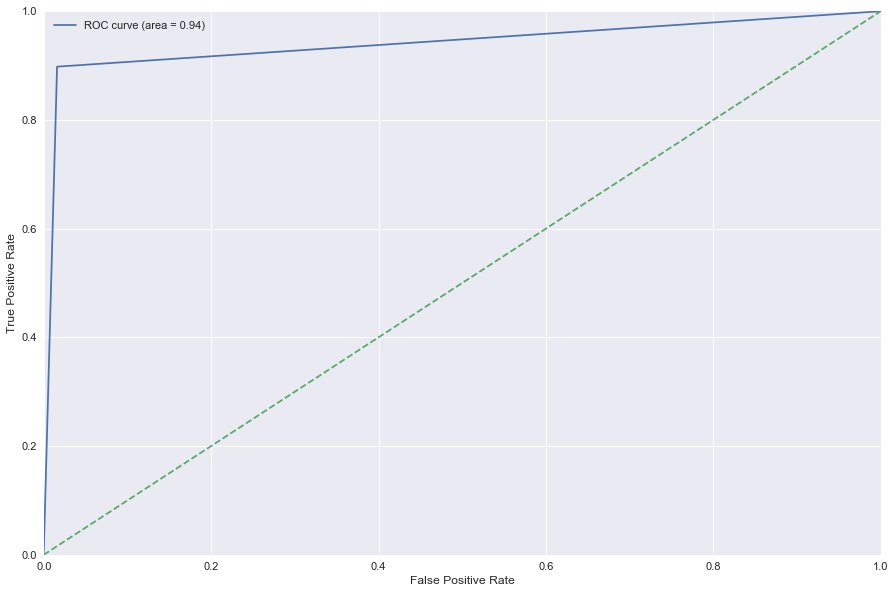

In [127]:
y_pred = svclassifier.predict(X_test_original)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test_original, y_pred)
print("Confusion Matrix:")
print(cm)

plt_roc_curve(y_test_original, y_pred)

By comparing the results obtained using **Logistic Regression** and **SVM**, both approaches presented good results, in terms of AUC score:
<br>
- **Logistic Regression:** 95.1%
<br>
- **SVM:** 94.1%

Besides **Logistic Regression** and **SVM** techniques, other models should be applied and tested, like Random Forest and Gradient Descent variants (SGD, XGBoost, ...).

Other possible improvements could be, testing other feature selection methods for determining more relevant features and testing other techniques for dealing with the unbalanced dataset, as SMOTE, which tries to combine undersampling and oversampling. Moreover, regarding the SVM, other kernels besides **Linear** coulbe be tested, as well as other hyperparameters.

Finally, another relevant aspect in the data preprocessing that was not covered in this notebook is the presence of **Outliers**. Thus, novel methods for detecting and removing outliers can also contribute to improving the results. 